In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
import matplotlib.pyplot as plt
from mod_4_nlp_project.functions import *
import nltk
from nltk.corpus import gutenberg, stopwords
from nltk.collocations import *
from nltk import FreqDist
from nltk import word_tokenize
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
df = pd.read_csv('mod_4_nlp_project/cleaned_reviews_dataframe')

In [3]:
df.head()

,reviews,sentiment,cleaned_reviews
0,Working with one of the best Shakespeare sourc...,0,work with one of the good shakespeare source t...
1,"Well...tremors I, the original started off in ...",0,well tremor i the original start off in and i ...
2,Ouch! This one was a bit painful to sit throug...,0,ouch this one be a bit painful to sit through ...
3,"I've seen some crappy movies in my life, but t...",0,-PRON- have see some crappy movie in -PRON- li...
4,"""Carriers"" follows the exploits of two guys an...",0,carrier follow the exploit of two guy and tw...


## Explore Uni-, Bi-, Tri- grams

In [4]:
#create neg. and pos. dataframes
df_negative = df[:12499]
df_positive = df[12500:]

In [5]:
stopwords_list = stopwords.words('english')+['pron', '-PRON-']

In [6]:
#function to find highest count n-gram
def n_gram(df_col, n=None):
    # Build the vectorizer, specify max features 
    vect = CountVectorizer(ngram_range = (n,n), stop_words = stopwords_list, min_df = 10)
    
    vect_fit = vect.fit_transform(df_col)
    
    word_list = vect.get_feature_names()
    
    count_list = vect_fit.toarray().sum(axis=0)
    
    count_dict = dict(zip(word_list, count_list))
    
    sort_vocab = sorted(count_dict.items(), key=lambda x: x[1], reverse=True)
    
    return sort_vocab

### Unigrams for all, neg, and pos reviews

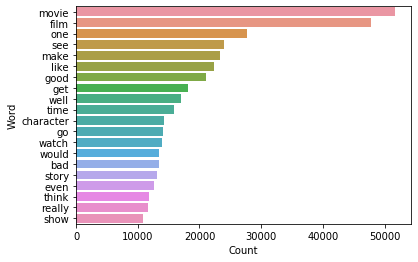

In [7]:
# top 20 words for full df
full_vocab = n_gram(df['cleaned_reviews'], n=1)
unigram_full = pd.DataFrame(full_vocab[:20], columns = ['Word','Count'])
sns.barplot(unigram_full['Count'],unigram_full['Word'])

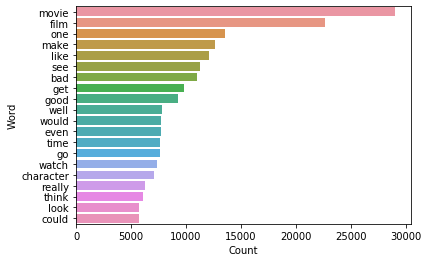

In [8]:
# top 20 words for neg df
full_vocab = n_gram(df_negative['cleaned_reviews'], n=1)
unigram_full = pd.DataFrame(full_vocab[:20], columns = ['Word','Count'])
sns.barplot(unigram_full['Count'],unigram_full['Word'])

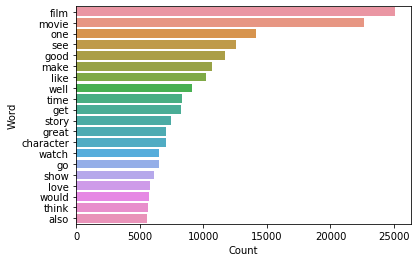

In [9]:
# top 20 words for pos df
full_vocab = n_gram(df_positive['cleaned_reviews'], n=1)
unigram_full = pd.DataFrame(full_vocab[:20], columns = ['Word','Count'])
sns.barplot(unigram_full['Count'],unigram_full['Word'])

### Bigrams for all, neg, and pos reviews

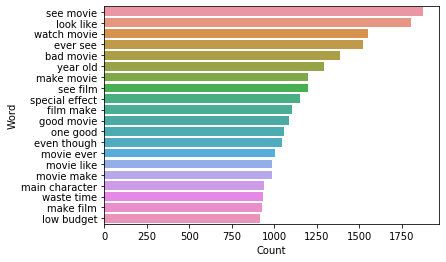

In [10]:
# top 20 bigrams for full df
full_vocab = n_gram(df['cleaned_reviews'], n=2)
unigram_full = pd.DataFrame(full_vocab[:20], columns = ['Word','Count'])
sns.barplot(unigram_full['Count'],unigram_full['Word'])

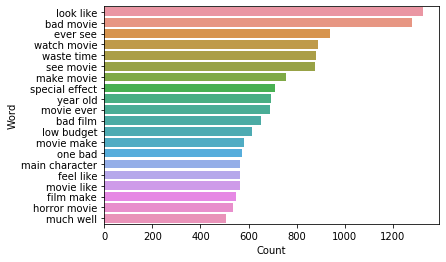

In [11]:
# top 20 bigrams for neg df
full_vocab = n_gram(df_negative['cleaned_reviews'], n=2)
unigram_full = pd.DataFrame(full_vocab[:20], columns = ['Word','Count'])
sns.barplot(unigram_full['Count'],unigram_full['Word'])

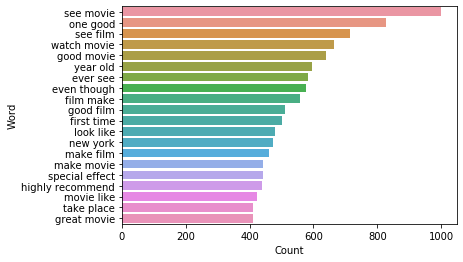

In [12]:
# top 20 bigrams for pos df
full_vocab = n_gram(df_positive['cleaned_reviews'], n=2)
unigram_full = pd.DataFrame(full_vocab[:20], columns = ['Word','Count'])
sns.barplot(unigram_full['Count'],unigram_full['Word'])

### Trigrams for all, neg, and pos reviews

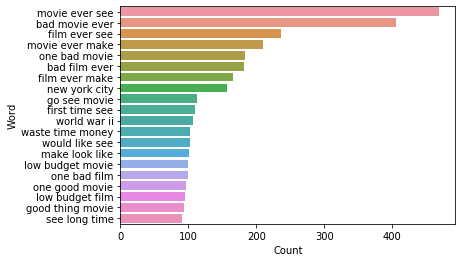

In [13]:
# top 20 trigrams for full df
full_vocab = n_gram(df['cleaned_reviews'], n=3)
unigram_full = pd.DataFrame(full_vocab[:20], columns = ['Word','Count'])
sns.barplot(unigram_full['Count'],unigram_full['Word'])

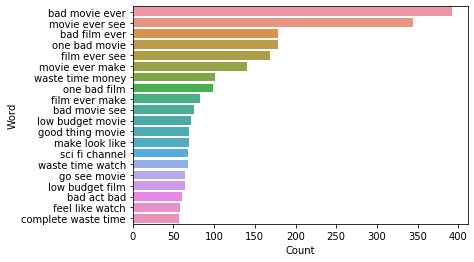

In [14]:
# top 20 trigrams for neg df
full_vocab = n_gram(df_negative['cleaned_reviews'], n=3)
unigram_full = pd.DataFrame(full_vocab[:20], columns = ['Word','Count'])
sns.barplot(unigram_full['Count'],unigram_full['Word'])

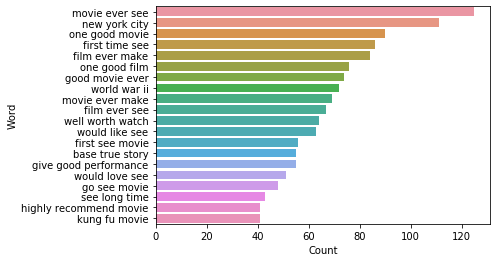

In [15]:
# top 20 trigrams for pos df
full_vocab = n_gram(df_positive['cleaned_reviews'], n=3)
unigram_full = pd.DataFrame(full_vocab[:20], columns = ['Word','Count'])
sns.barplot(unigram_full['Count'],unigram_full['Word'])

---

In [16]:
# Create column of each review's length
df['length'] = [len(x) for x in df['reviews']]

In [17]:
# Maximum Review Length
df.length.max()

13604

In [18]:
# Average Review Length
print('Average Review length for all reviews: ',df.length.values.mean())
print('Average Review length for negative reviews: ',df[:12499].length.values.mean())
print('Average Review length for positive reviews: ',df[12500:].length.values.mean())

Average Review length for all reviews:  1304.69564
Average Review length for all reviews:  1281.996559724778
Average Review length for all reviews:  1327.46664


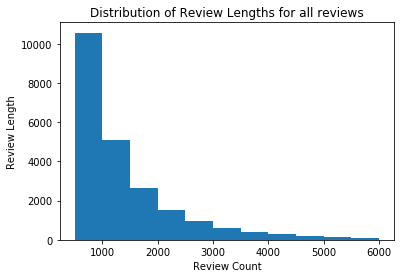

In [19]:
plt.hist(df.length.values, bins=[500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000])
plt.title('Distribution of Review Lengths for all reviews')
plt.xlabel('Review Count')
plt.ylabel('Review Length')
plt.show()

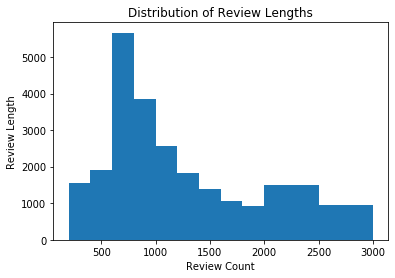

In [20]:
plt.hist(df.length.values, bins=[200,400,600,800,1000,1200,1400,1600,1800,2000,2500,3000])
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Count')
plt.ylabel('Review Length')
plt.show()

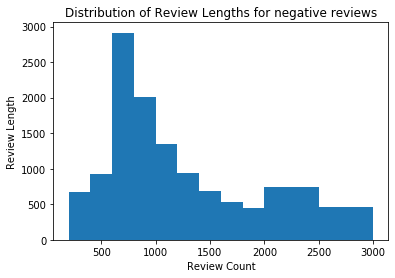

In [21]:
plt.hist(df[:12499].length.values, bins=[200,400,600,800,1000,1200,1400,1600,1800,2000,2500,3000])
plt.title('Distribution of Review Lengths for negative reviews')
plt.xlabel('Review Count')
plt.ylabel('Review Length')
plt.show()

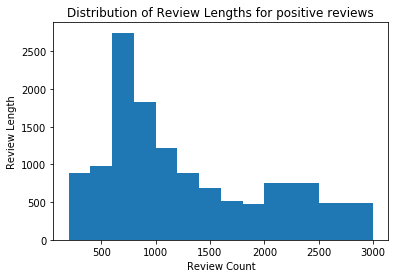

In [22]:
plt.hist(df[12500:].length.values, bins=[200,400,600,800,1000,1200,1400,1600,1800,2000,2500,3000])
plt.title('Distribution of Review Lengths for positive reviews')
plt.xlabel('Review Count')
plt.ylabel('Review Length')
plt.show()

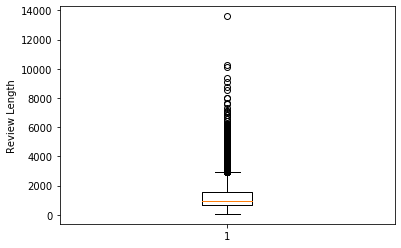

In [23]:
plt.boxplot(df.length.values)
plt.ylabel('Review Length')
plt.show()